# Лабораторная работа №4
## Интервальные оценки.

#### 1. Доверительный интервал для математического ожидания СВ.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
n = 20

a = 1
b = 2

In [3]:
def get_sample(n):
    X = []
    Yi = []
    uniform_rv = sts.uniform()
    Ei = sts.uniform().rvs(size=n)

    for i in range(n):
        x = Ei[i] * (b - a) + a
        X.append(x)
        y = np.exp(x)
        Yi.append(y)
    return Yi

Yi = get_sample(n)

1.1. Cформировать выборку из 20 случайных чисел. Найти точечную оценку математического ожидания случайной величины.

Несмещенная состоятельная оценка математического ожидания вычисляется по формуле:

$$\bar{x}=\sum_{i=0}^{n}\frac{x_i}{n}$$

In [4]:
average = sum(Yi) / n
print(average)

4.646457093675779


1.2. Найти точечную оценку дисперсии случайной величины.

Несмещенная состоятельная оценка дисперсии:

$$S^2_0=\frac{1}{n-1}\sum_{i=0}^{n}(x_i-\bar{x})^2$$

In [26]:
def empirical_D(Yi, average):
    S0 = 0
    for varianta in Yi:
        S0 += (varianta - average) ** 2
    S0 = S0 / (len(Yi) - 1)
    return S0
S0 = empirical_D(Yi, average)

print(S0)

1.708296316987794


1.3. Найти доверительный интервал для оценки математического ожидания случайной величины для различных уровней значимости.

Уровенями значимости $\gamma$ будут служить значения $0.9$, $0.95$, $0.98$, $0.99$. Так как у распределения Стьюдента будет $n-1=19$ степеней свободы, по таблице определим значения для уровней значимости: $t_{0.9, 19}=1.73,t_{0.95, 19}=2.093, t_{0.98, 19}=2.54, t_{0.99, 19}=2.861$

Построим доверительный интервал для каждого $t$:

$$\bar{x}-\frac{s\cdot t_{\gamma, n-1}}{\sqrt{n-1}}\le m_x <\bar{x}+\frac{s\cdot t_{\gamma, n-1}}{\sqrt{n-1}}$$

In [6]:
p_conf = [0.9, 0.95, 0.98, 0.99]
t_rv = sts.t(n-1)
arr = t_rv.rvs(1000000)

table_value = []
for i in p_conf:
    tmp = sts.mstats.mquantiles(arr, prob=[1-(1-i)/2])
    table_value.append(tmp[0])
print(table_value)
#table_value = [1.73, 2.093, 2.54, 2.861]
intervals = []

for i in table_value:
    intervals.append((average - np.sqrt(S0) * i / np.sqrt(n - 1), average + np.sqrt(S0) * i / np.sqrt(n - 1)))
    
intervals

[1.7276526136019834, 2.0908778026642194, 2.5401593416996806, 2.8570311974518017]


[(4.0784812225674845, 5.2144329647840735),
 (3.959068823603797, 5.333845363747761),
 (3.811364897769706, 5.481549289581852),
 (3.7071914274299242, 5.585722759921634)]

 _1.4. Построить график зависимости величины доверительного интервала от уровня значимости._

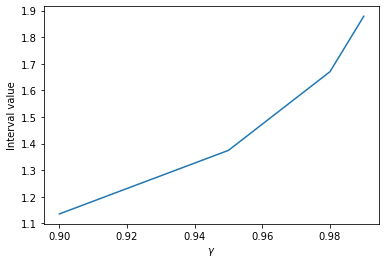

In [7]:
plt.plot(p_conf, [i[1] - i[0] for i in intervals])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

1.5. Найти теоретическое значение дисперсии случайной величины по известной плотности распределения.

Плотность распределения равна $f(y) = \frac{1}{n}, exp(1)<y<exp(2)$. Тогда теоретическая дисперсия будет равна:

$$D[X] = M[X^2] - M^2[X] = \int_{exp(1)}^{exp(2)} \frac{x^2}{x}dx - \big{(}\int_{exp(1)}^{exp(2)} \frac{x}{x}dx\big{)}^2$$

In [8]:
import scipy.integrate as integrate
DY = integrate.quad(lambda x: ((x**2)/x), np.exp(1), np.exp(2))[0] - \
(integrate.quad(lambda x: (x/x), np.exp(1), np.exp(2)))[0]**2 

print(DY)

1.7884146814072395


1.6. Найти доверительный интервал для оценки математического ожидания случайной величины при известной дисперсии для различных уровней значимости.


In [9]:
intervals2 = []

for i in table_value:
    intervals2.append((average - np.sqrt(DY) * i / np.sqrt(n - 1), average + np.sqrt(DY) * i / np.sqrt(n - 1)))
    
intervals2

[(4.116410882804593, 5.176503304546965),
 (4.00497289252829, 5.287941294823268),
 (3.8671326950804805, 5.425781492271077),
 (3.769915971561648, 5.52299821578991)]

1.7. Построить график зависимости величины доверительного интервала от уровня значимости.

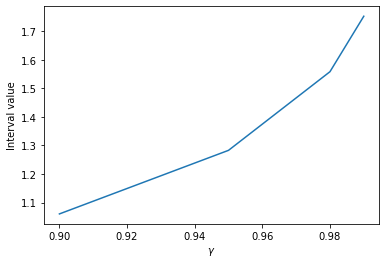

In [10]:
plt.plot(p_conf, [i[1] - i[0] for i in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

1.8. Сравнить результаты, полученные по п.п. 1.4, 1.7.

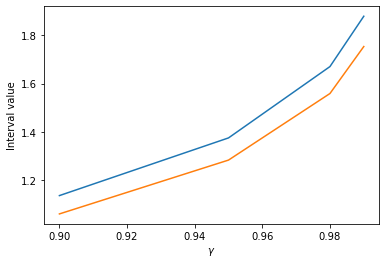

In [11]:
plt.plot(p_conf, [i[1] - i[0] for i in intervals])
plt.plot(p_conf, [i[1] - i[0] for i in intervals2]) 
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

1.9. Повторить п.п. 1.2 – 1.8. для различного объема выборки: n = 30, 50, 70, 100, 150.

5.120068388932555
2.040980158911931
[1.7047305449176704, 2.0485162519066864, 2.4624392248971487, 2.760030754283112]
1.7884146814072395


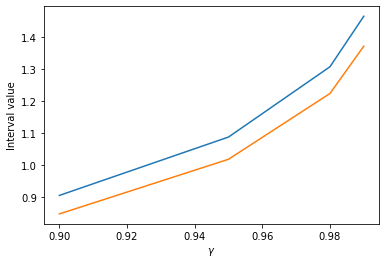

5.086974953926099
1.6155058334088022
[1.6769125436760857, 2.0127879783500013, 2.4056951657558923, 2.6798981236330484]
1.7884146814072395


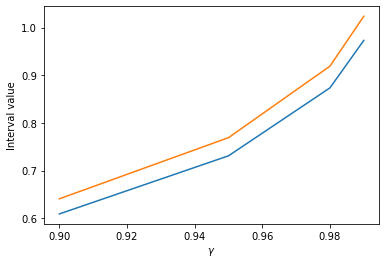

4.49668946520922
1.6275358110174907
[1.6682031484266704, 1.9961483121971335, 2.3838304638921137, 2.658782253225811]
1.7884146814072395


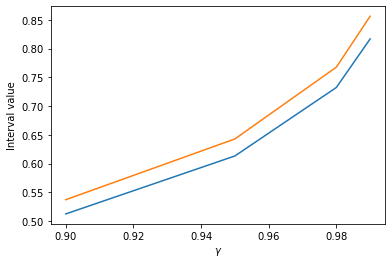

4.686473912085401
1.8243130172362378
[1.659695464204879, 1.9823047024261546, 2.3614665447852574, 2.6256025604444417]
1.7884146814072395


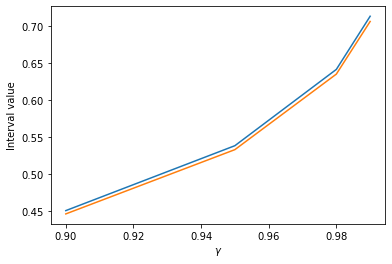

4.524960307127037
1.8899145563930673
[1.657738179197716, 1.980687228764603, 2.356748076981439, 2.6184381828678185]
1.7884146814072395


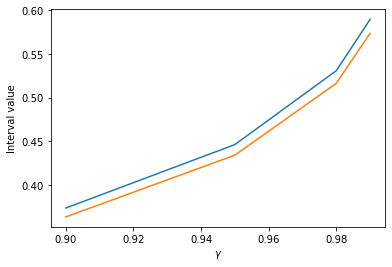

4.774224257652738
1.9208401258060692
[1.6471352619392867, 1.9650709675395093, 2.330118026993021, 2.583645307093951]
1.7884146814072395


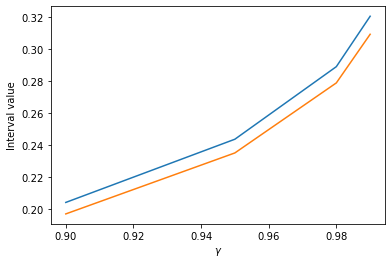

4.699227877631134
1.8608156572887615
[1.6476522588821632, 1.9636644246540462, 2.3318891514466005, 2.5862370660959053]
1.7884146814072395


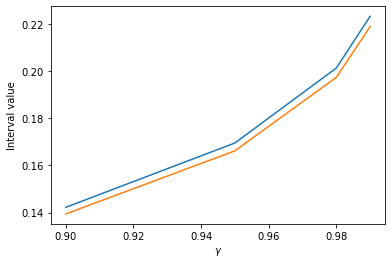

4.652940339611936
1.7745343224628796
[1.6460987391988409, 1.958104465452069, 2.3243698392405454, 2.5731556625934786]
1.7884146814072395


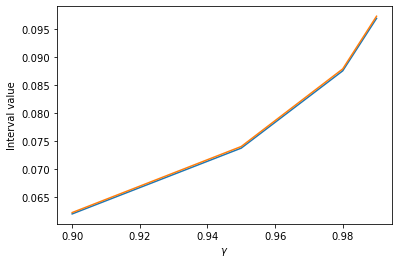

4.678118383693766
1.774388929313768
[1.644983541149729, 1.9585770509043223, 2.324431436847426, 2.5695384261574326]
1.7884146814072395


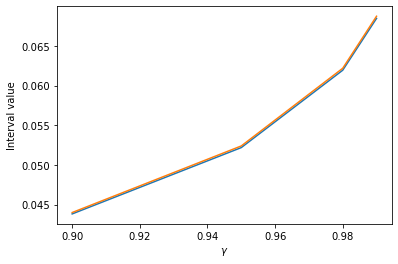

4.675748277447669
1.784648376834408
[1.644211029723506, 1.9587428757693632, 2.3225803571193158, 2.5661903748605903]
1.7884146814072395


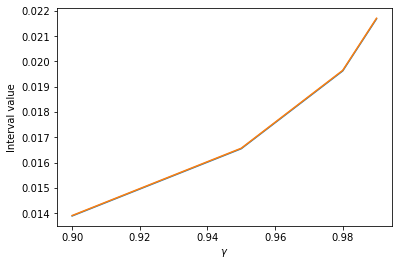

In [12]:
def ev_routine(n):
    Yi = get_sample(n)
    average = sum(Yi) / n
    print(average)
    def empirical_D(Yi, average):
        S0 = 0
        for varianta in Yi:
            S0 += (varianta - average) ** 2
        S0 = S0 / (n - 1)
        return S0
    S0 = empirical_D(Yi, average)

    print(S0)
    p_conf = [0.9, 0.95, 0.98, 0.99]
    t_rv = sts.t(n-1)
    arr = t_rv.rvs(1000000)

    table_value = []
    for i in p_conf:
        tmp = sts.mstats.mquantiles(arr, prob=[1-(1-i)/2])
        table_value.append(tmp[0])
    print(table_value)
    #ts = [1.73, 2.093, 2.54, 2.861]
    intervals = []

    for i in table_value:
        intervals.append((average - np.sqrt(S0) * i / np.sqrt(n - 1), average + np.sqrt(S0) * i / np.sqrt(n - 1)))

    intervals
    
    import scipy.integrate as integrate
    DY = integrate.quad(lambda x: ((x**2)/x), np.exp(1), np.exp(2))[0] - \
    (integrate.quad(lambda x: (x/x), np.exp(1), np.exp(2)))[0]**2 
    print(DY)
    
    intervals2 = []

    for i in table_value:
        intervals2.append((average - np.sqrt(DY) * i / np.sqrt(n - 1), average + np.sqrt(DY) * i / np.sqrt(n - 1)))

    intervals2
    
    plt.plot(p_conf, [i[1] - i[0] for i in intervals])
    plt.plot(p_conf, [i[1] - i[0] for i in intervals2])
    plt.xlabel("$\gamma$")
    plt.ylabel("Interval value")
    
    plt.show()
    return intervals2
    
n = [30, 50, 70, 100, 150, 500, 1000, 5000, 10000, 100000]
intervals = []

for i in n:
    intervals.append(ev_routine(i))

1.10. Построить графики зависимости величины доверительного интервала от объема выборки.

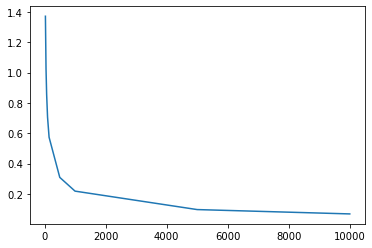

In [13]:
# для уровня 0.99
plt.plot(n[:-1], [(i[-1][1] - i[-1][0]) for i in intervals[:-1]])

#### 2._ Доверительный интервал для дисперсии СВ.

2.1. Сформировать выборку из 20 случайных чисел. Найти точечную оценку дисперсии случайной величины.

Несмещенная состоятельная оценка дисперсии вычисляется по формуле:

$$S^2_0=\frac{1}{n-1}\sum_{i=0}^{n}(x_i-\bar{x})^2$$

In [14]:
n = 20
Yi = get_sample(n)
average = sum(Yi) / n
S0 = empirical_D(Yi, average)
print(S0)

1.708296316987794


2.2. Найти точечную оценку математического ожидания случайной величины.

Несмещенная состоятельная оценка дисперсии:

$$\bar{x}=\sum_{i=0}^{n}\frac{x_i}{n}$$

In [15]:
print(average)

4.9873381051232295


2.3. Найти доверительный интервал для оценки дисперсии случайной величины для различных уровней значимости.

Уровенями значимости $\gamma$ будут служить значения $0.9$, $0.95$, $0.98$, $0.99$. Так как у $\chi^2$ распределения будет $n-1=19$ степеней свободы, по таблице определим значения для всех уровней значимости $\chi^2_{\frac{1-\gamma}{2}, n-1}$ и $\chi^2_{\frac{1+\gamma}{2}, n-1}$: $\chi^2_{0.05, 19}=30.14353$ и $\chi^2_{0.95, 19}=10.11701, \chi^2_{0.025, 19}=32.85233$ и $\chi^2_{0.975, 19}=8.90652, \chi^2_{0.01, 19}=36.19087$ и $\chi^2_{0.99, 19}=7.63273, \chi^2_{0.005, 19}=38.58226$ и $\chi^2_{0.995, 19}=6.84397$

Построим доверительный интервал для каждых $\chi^2_{\frac{1-\gamma}{2}, n-1}$ и $\chi^2_{\frac{1+\gamma}{2}, n-1}$:

$$\frac{n\cdot s^2}{\chi^2_{\frac{1-\gamma}{2}, n-1}}\le D_x <\frac{n\cdot s^2}{\chi^2_{\frac{1+\gamma}{2}, n-1}}$$

In [16]:
p_conf = [0.9, 0.95, 0.98, 0.99]

chi_rv = sts.chi2(n-1)
arr = chi_rv.rvs(100000)

chip = []
chim = []
for i in p_conf:
    tmp = sts.mstats.mquantiles(arr, prob=[(1-i)/2, (1+i)/2])
    chip.append(tmp[0])
    chim.append(tmp[1])

intervals = []

for i in range(len(chim)):
    intervals.append(((n-1) * S0 / chim[i], (n - 1) * S0 / chip[i]))
    
intervals

[(1.078544134662329, 3.224157241500888),
 (0.9928038903404686, 3.669793635131812),
 (0.898784825244651, 4.2663430158428),
 (0.8403174520831437, 4.763142980340238)]

_2.4. Построить график зависимости величины доверительного интервала от уровня значимости._

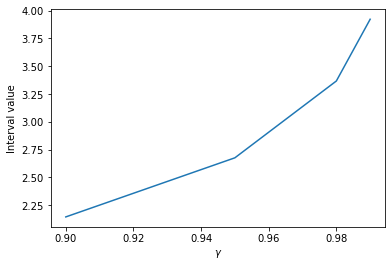

In [17]:
plt.plot(p_conf, [i[1] - i[0] for i in intervals])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

2.5. Найти теоретическое значение математического ожидания случайной величины по известной плотности распределения ( задание 2, п.3).

Плотность распределения равна $f(y) = \frac{1}{x}, exp(1)<y<exp(2)$. Тогда теоретическое МО будет равно:

$$M[X] = \int_{exp(1)}^{exp(2)} \frac{x}{x}dx$$

In [18]:
import scipy.integrate as integrate
MY = integrate.quad(lambda x: (x/x), np.exp(1), np.exp(2))[0]
print(MY)

4.670774270471606


2.6. Найти доверительный интервал для оценки дисперсии случайной величины при известном математическом ожидании для различных уровней значимости.

In [19]:
intervals2 = []

for i in range(len(chim)):
    intervals2.append((n * empirical_D(Yi, MY) / chim[i], n * empirical_D(Yi, MY) / chip[i]))
    
intervals2

[(1.2054147944051696, 3.6034193812666757),
 (1.1095888048513511, 4.101476609102105),
 (1.004510145220864, 4.768198930416661),
 (0.9391651729254524, 5.323438171741414)]

2.7. Построить график зависимости величины доверительного интервала от уровня значимости.

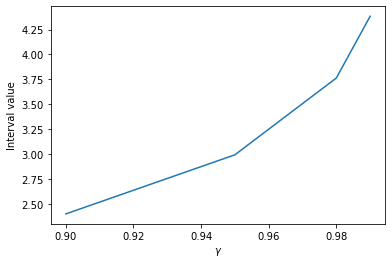

In [20]:
plt.plot(p_conf, [i[1] - i[0] for i in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

2.8. Сравнить результаты, полученные по п.п. 2.4, 2.7.

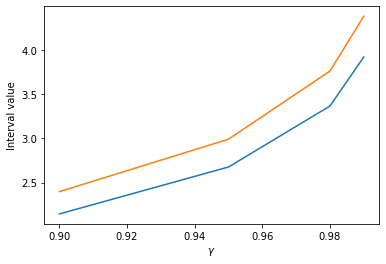

In [21]:
plt.plot(p_conf, [i[1] - i[0] for i in intervals])
plt.plot(p_conf, [i[1] - i[0] for i in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

2.9. Повторить п.п. 2.2 – 2.8. для различного объема выборки: n = 30, 50, 70, 100, 150.

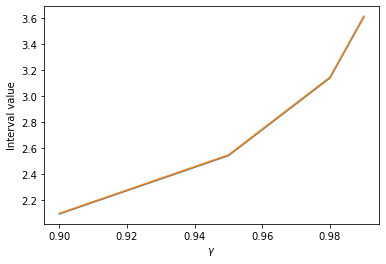

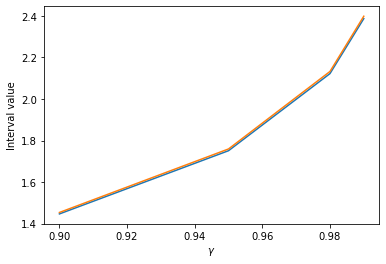

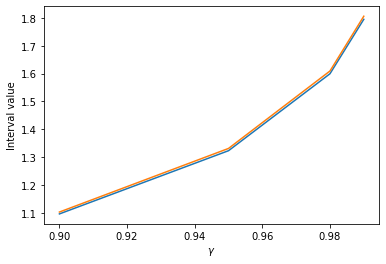

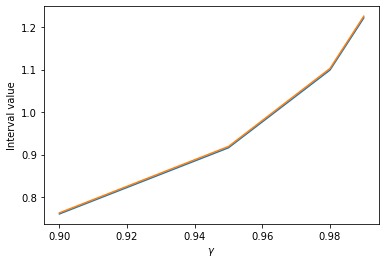

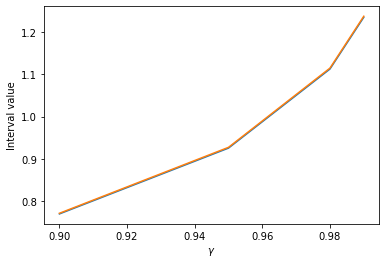

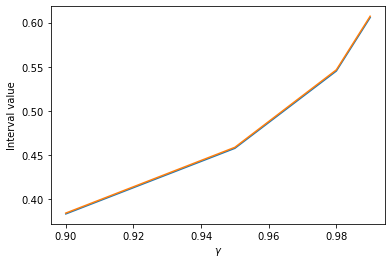

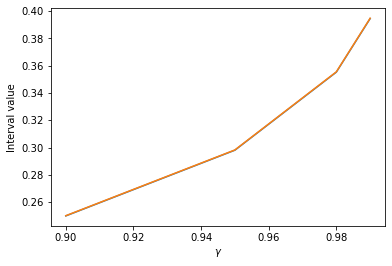

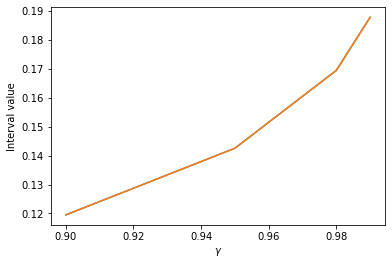

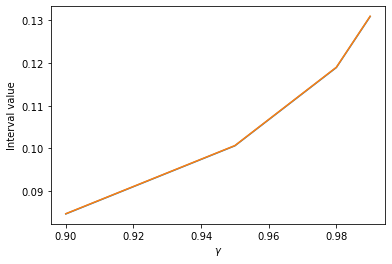

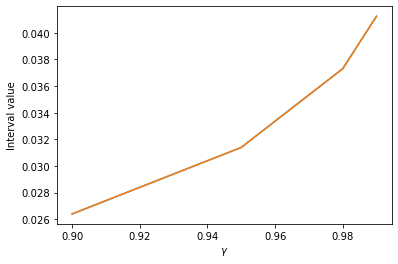

In [22]:
def d_routine(n):
    Yi = get_sample(n)
    average = sum(Yi) / n
    S0 = empirical_D(Yi, average)
    p_conf = [0.9, 0.95, 0.98, 0.99]
    chi2_rv = sts.chi2(n - 1)
    arr = chi2_rv.rvs(100000)

    chip = []
    chim = []
    for i in p_conf:
        tmp = sts.mstats.mquantiles(arr, prob=[(1-i)/2, (1+i)/2])
        chip.append(tmp[0])
        chim.append(tmp[1])
    
    intervals = []

    for i in range(len(chim)):
        intervals.append((n * S0 / chim[i], n * S0 / chip[i]))
    
    intervals2 = []
    
    for i in range(len(chim)):
        intervals2.append((n * empirical_D(Yi, MY) / chim[i], n * empirical_D(Yi, MY) / chip[i]))

    plt.plot(p_conf, [i[1] - i[0] for i in intervals])
    plt.plot(p_conf, [i[1] - i[0] for i in intervals2])
    plt.xlabel("$\gamma$")
    plt.ylabel("Interval value")
    plt.show()
    return intervals2
    
n = [30, 50, 70, 100, 150, 500, 1000, 5000, 10000, 100000]
intervals = []

for i in n:
    intervals.append(d_routine(i))

2.10. Построить графики зависимости величины доверительного интервала от объема выборки.

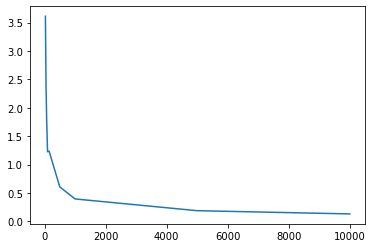

In [23]:
# для уровня 0.99
plt.plot(n[:-1], [(i[-1][1] - i[-1][0]) for i in intervals[:-1]])